# Plot scan

In [8]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from itertools import product
import seaborn as sns
import sys
sys.path.append('../')
pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']

In [9]:
#Load scan data
pclFile = './hs_combined_55.pcl'
dataDF = pd.read_pickle(pclFile)
# Round lifetimes
dataDF['tau_ns'] = dataDF['tau_ns'].apply(lambda x: round(x, 3 - int(np.floor(np.log10(abs(x))))))
# print(dataDF.columns.values.tolist()) #Print all columns names

In [10]:
dataDF.T

,0,1,2,3,4,5,6,7,8,9,10,11
Luminosity (1/fb),139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0
SR,HighPT,Trackless,HighPT,Trackless,HighPT,Trackless,HighPT,Trackless,HighPT,Trackless,HighPT,Trackless
$N_s$,0.0,0.0,0.3191,10.62,0.4376,10.87,0.48,5.246,1.921,23.56,0.8286,21.09
$N_s$ Err,0.0,0.0,0.1512,0.8451,0.2167,0.9945,0.2159,0.6498,0.4882,1.545,0.274,1.411
AccEff,0.0,0.0,0.000002,0.000082,0.000003,0.000084,0.000004,0.000041,0.000015,0.000183,0.000006,0.000164
AccEffErr,0.0,0.0,0.000001,0.000007,0.000002,0.000008,0.000002,0.000005,0.000004,0.000012,0.000002,0.000011
Total,"(128900.0, 1.0)","(128900.0, 1.0)","(128700.0, 1.0)","(128700.0, 1.0)","(128800.0, 1.0)","(128800.0, 1.0)","(128800.0, 1.0)","(128800.0, 1.0)","(128800.0, 1.0)","(128800.0, 1.0)","(128800.0, 1.0)","(128800.0, 1.0)"
Total Error,"(576.2, 0.0)","(576.2, 0.0)","(166.2, 0.0)","(166.2, 0.0)","(166.2, 0.0)","(166.2, 0.0)","(166.2, 0.0)","(166.2, 0.0)","(166.3, 0.0)","(166.3, 0.0)","(166.2, 0.0)","(166.2, 0.0)"
Jet selection,"(0.0, 0.0)","(56.7, 0.00044)","(3.219, 2.5e-05)","(74.67, 0.00058)","(2.146, 1.667e-05)","(63.52, 0.0004933)","(2.79, 2.167e-05)","(71.68, 0.0005567)","(4.078, 3.167e-05)","(71.9, 0.0005583)","(2.575, 2e-05)","(66.31, 0.000515)"
Jet selection Error,"(0.0, 0.0)","(12.09, 9.381e-05)","(0.831, 6.455e-06)","(4.003, 3.109e-05)","(0.6786, 5.271e-06)","(3.692, 2.867e-05)","(0.7738, 6.009e-06)","(3.922, 3.046e-05)","(0.9356, 7.265e-06)","(3.928, 3.05e-05)","(0.7434, 5.774e-06)","(3.772, 2.93e-05)"


### Compute UL on BR assuming SM higgs production cross-section

In [11]:
xsecHiggs = 48.5
dataDF['BR_UL'] = 1.0/(dataDF['robs']*(xsecHiggs/(dataDF['Total xsec (pb)']*dataDF['BR25_35_35'])))

### Define colors and plotting order

In [12]:
colors = sns.color_palette("Paired",10)
colorsPink = sns.color_palette("colorblind",8)
colorDict = {'HighPT' : colorsPink[4], #light pink
             'Trackless' : colors[4] }
srs = {'HighPT' : dataDF[(dataDF['SR'] == 'HighPT')], 'Trackless' : dataDF[(dataDF['SR'] == 'Trackless')]}


### Results from 2406.16281

In [13]:
x0 = [0.12047869097948206, 0.1503111337089839, 0.20345590109212808, 0.34760597373775026, 0.516441925624734, 0.7155078652736035, 1.0754879840697025, 1.4388907241083917, 2.373963752012692, 4.2493116509339925, 6.461995102393718, 10.176192997162854, 18.644194102662375, 36.20648347724506, 69.49798085741715, 153.40542138766222, 294.46016334958887, 592.1612021709192]
y0 = [0.5710132905990901, 0.3369825109107565, 0.16318451182760768, 0.04819773004413761, 0.021142355655692033, 0.012072566073972966, 0.006893595679874241, 0.005473199880337832, 0.004204572847686087, 0.0035657200187482695, 0.0034501049865597573, 0.003338238660270108, 0.004204572847686087, 0.005473199880337832, 0.008128687913276004, 0.016241792090472332, 0.034663890219110496, 0.08167054235998067]
xy0 = np.array(list(zip(x0,y0)))

### Plot excluded points grouped by most excluding analysis

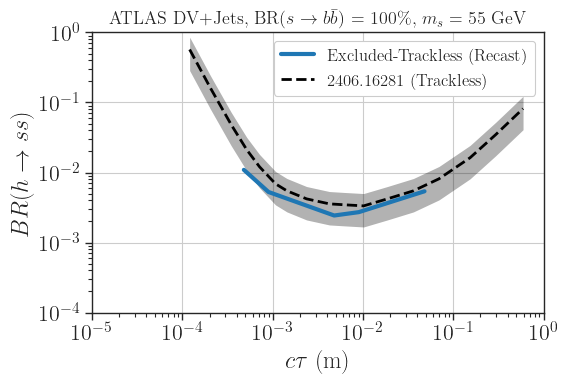

In [22]:

plt.figure(figsize=(6,4))
n = 0
for sr,data in srs.items():
    if 'HighPT' in sr: continue
    x = np.array(data['tau_ns']*3e8*1e-9)
    y = np.array(data['BR_UL'])
    y = y[np.argsort(x)]
    x = x[np.argsort(x)]
    color = colorDict[sr]
    # plt.scatter(x,y,s=50)
    plt.plot(x,y,label='Excluded-%s (Recast)' %sr,linewidth=3.0)

plt.plot(xy0[:,0]/1e3,xy0[:,1],linewidth=2,linestyle='dashed',label='2406.16281 (Trackless)',color='black')
plt.fill_between(xy0[:,0]/1e3,xy0[:,1]*0.5,xy0[:,1]*1.5,linewidth=0,alpha=0.3,color='black')

lgd = plt.legend(framealpha=1.0,fontsize=12)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$c \tau$ (m)')
plt.ylabel(r'$BR(h \to s s)$')
plt.tight_layout()
plt.xlim(1e-5,1)
plt.ylim(1e-4,1)
# plt.ylim(1e-2,1)
plt.grid()
plt.tight_layout()
plt.title(r'ATLAS DV+Jets, BR($s \to b\bar{b}$) = 100\%, $m_{s} = 55$ GeV', fontsize=13)
plt.savefig('recastHS.png')
plt.show()

In [20]:
dataDF['tau_ns']

0     0.0003
1     0.0003
2     0.1600
3     0.1600
4     0.0030
5     0.0030
6     0.0016
7     0.0016
8     0.0160
9     0.0160
10    0.0300
11    0.0300
Name: tau_ns, dtype: float64

In [19]:
dataDF.iloc[10]

Luminosity (1/fb)                    139.0
SR                                  HighPT
$N_s$                               0.8286
$N_s$ Err                            0.274
AccEff                            0.000006
AccEffErr                         0.000002
Total                      (128800.0, 1.0)
Total Error                   (166.2, 0.0)
Jet selection               (2.575, 2e-05)
Jet selection Error    (0.7434, 5.774e-06)
DV selection           (0.8286, 6.435e-06)
DV selection Error      (0.274, 2.128e-06)
mLLP                                  55.0
mLSP                                  55.0
width                                  0.0
BR25_35_35                             1.0
tau_ns                                0.03
Total MC Events                     600000
Total xsec (pb)                     0.9263
robs                              0.218053
rexp                               0.26729
robsErr                           0.072105
rexpErr                           0.088387
robs_comb  